In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# data = pd.read_pickle('lending-club/myPickle.pkl')
data = pd.read_pickle("C:/Users/zminoti/Documents/Kaggle/LendingClub/data/pkl/myPickle.pkl")

In [8]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,pymnt_plan,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
42535,27050.0,27050.0,27050.0,0,10.99,885.46,55000.0,2013,0,22.87,...,0,0,0,0,0,0,0,0,0,0
42536,9750.0,9750.0,9750.0,0,13.98,333.14,26000.0,2013,0,25.12,...,0,0,0,0,0,0,0,0,0,0
42537,12000.0,12000.0,12000.0,0,6.62,368.45,105000.0,2013,0,14.05,...,0,0,0,0,0,0,0,0,0,0
42538,12000.0,12000.0,12000.0,0,13.53,407.40,40000.0,2013,0,16.94,...,0,0,0,0,0,0,0,0,0,0
42539,15000.0,15000.0,15000.0,0,8.90,476.30,63000.0,2013,0,16.51,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))   

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET',axis=1),data['TARGET'],test_size=0.15,random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(x_train_r, y_train_r)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=21,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [18]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7933

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88    122332
           1       0.01      0.86      0.01       177

   micro avg       0.79      0.79      0.79    122509
   macro avg       0.50      0.83      0.45    122509
weighted avg       1.00      0.79      0.88    122509


Confusion Matrix: 
 [[97036 25296]
 [   25   152]]



In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=80, random_state=21, max_depth=20, max_features=20)
clf_rf.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [20]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9991

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    122332
           1       0.77      0.57      0.66       177

   micro avg       1.00      1.00      1.00    122509
   macro avg       0.89      0.79      0.83    122509
weighted avg       1.00      1.00      1.00    122509


Confusion Matrix: 
 [[122302     30]
 [    76    101]]



In [48]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9986

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    122332
           1       1.00      0.06      0.11       177

   micro avg       1.00      1.00      1.00    122509
   macro avg       1.00      0.53      0.55    122509
weighted avg       1.00      1.00      1.00    122509


Confusion Matrix: 
 [[122332      0]
 [   167     10]]



In [24]:
clf_rf.feature_importances_

array([2.67948711e-03, 1.95371409e-03, 1.90875403e-03, 1.30992669e-02,
       1.81962848e-02, 1.29003184e-03, 1.40612998e-03, 1.02320885e-01,
       0.00000000e+00, 2.39799918e-03, 1.58880638e-03, 5.16731387e-03,
       2.04978349e-02, 1.54841396e-03, 2.29623330e-03, 3.17004433e-03,
       1.15611609e-03, 1.30244851e-03, 1.33206657e-03, 3.19658367e-02,
       5.85404970e-02, 4.79817792e-02, 7.38943005e-03, 8.81329407e-03,
       1.40821725e-02, 1.01266782e-02, 1.12460685e-03, 6.57866422e-04,
       2.15456654e-04, 4.08855175e-01, 1.64070967e-02, 0.00000000e+00,
       4.24677840e-03, 1.47629162e-04, 0.00000000e+00, 0.00000000e+00,
       1.15337116e-04, 7.83148233e-04, 1.63657809e-03, 1.16900244e-03,
       3.90037271e-03, 3.53531970e-03, 2.18583396e-03, 1.07877859e-03,
       6.13120574e-04, 1.03711134e-03, 1.14698154e-04, 3.16028365e-05,
       9.02801188e-05, 1.02189322e-04, 1.43272688e-04, 4.33967294e-04,
       2.92848589e-04, 3.91928205e-04, 4.02505612e-04, 1.13967854e-03,
      

<Figure size 216x7200 with 0 Axes>

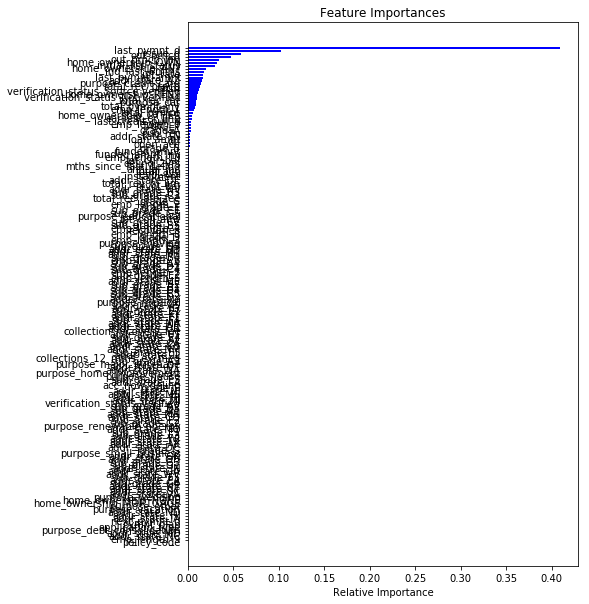

<Figure size 216x7200 with 0 Axes>

In [72]:
features = data.columns
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center',)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.rcParams["figure.figsize"] = (7,10)
# plt.figure(figsize=(3,100))

In [43]:
X = data.drop('TARGET',axis=1)
feature_importances = pd.DataFrame(clf_rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
last_pymnt_d,4.088552e-01
issue_d,1.023209e-01
out_prncp,5.854050e-02
out_prncp_inv,4.798178e-02
home_ownership_RENT,3.424645e-02
initial_list_status,3.196584e-02
home_ownership_MORTGAGE,3.052614e-02
inq_last_6mths,2.049783e-02
int_rate,1.819628e-02
last_pymnt_amnt,1.640710e-02


In [44]:
feature_importances[:10]

,importance
last_pymnt_d,0.408855
issue_d,0.102321
out_prncp,0.058540
out_prncp_inv,0.047982
home_ownership_RENT,0.034246
initial_list_status,0.031966
home_ownership_MORTGAGE,0.030526
inq_last_6mths,0.020498
int_rate,0.018196
last_pymnt_amnt,0.016407


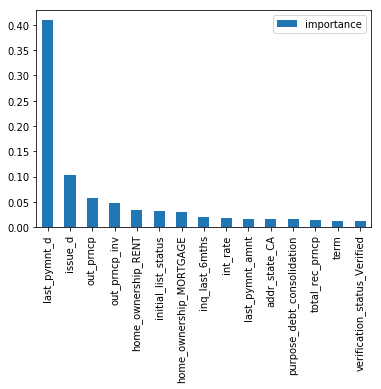

In [53]:
feature_importances[:15].plot(kind='bar')

In [41]:
data.TARGET

(816722, 168)

In [57]:
y_train.value_counts()

0    693190
1      1023
Name: TARGET, dtype: int64

In [54]:
X_train.shape

(694213, 167)

In [ ]:
data.to_csv()